In [3]:
import numpy as np
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


In [4]:
# Define the paths to the folders containing subject data
data_folder_heart = '/motion-and-heart-rate-from-a-wrist-worn-wearable-and-labeled-sleep-from-polysomnography-1.0.0/heart_rate'
data_folder_label = '/motion-and-heart-rate-from-a-wrist-worn-wearable-and-labeled-sleep-from-polysomnography-1.0.0/labels'
data_folder_motion = '/motion-and-heart-rate-from-a-wrist-worn-wearable-and-labeled-sleep-from-polysomnography-1.0.0/motion'

# Initialize empty dataframes for heart rate and label data
heart_rate_data = pd.DataFrame()
labels_data = pd.DataFrame()
motion_data = pd.DataFrame()

# Function to read and concatenate data
def read_and_concat_data(data_folder, data_frame, delimiter=',', column_index=1, column_dtype=str):
    for file_name in os.listdir(data_folder):
        file_path = os.path.join(data_folder, file_name)
        try:
            subject_data = pd.read_csv(file_path, header=None, delimiter=delimiter, skipinitialspace=True, usecols=[column_index])
            data_frame = pd.concat([data_frame, subject_data], axis=0, ignore_index=True)
        except Exception as e:
            print(f"Error reading file {file_name}: {e}")
    return data_frame

# Example usage for heart rate data (assuming heart rate is in the second column)
heart_rate_data = read_and_concat_data(data_folder_heart, heart_rate_data, column_index=1)

# Example usage for label data (assuming label is in the second column)
labels_data = read_and_concat_data(data_folder_label, labels_data, delimiter=' ', column_index=1, column_dtype=str)
motion_data = read_and_concat_data(data_folder_motion, motion_data, delimiter=' ', column_index=1, column_dtype=str)

# Merge heart rate and labels data
combined_data = pd.concat([labels_data, heart_rate_data, motion_data], axis=1)
combined_data.columns = ['Label', 'HeartRate', 'Acceleration']
print(combined_data.head())
combined_data.size


   Label  HeartRate  Acceleration
0    0.0       94.0     -0.158508
1    0.0       75.0     -0.154434
2    0.0       78.0     -0.143661
3    0.0       94.0     -0.166336
4    0.0       92.0     -0.141602


155457453

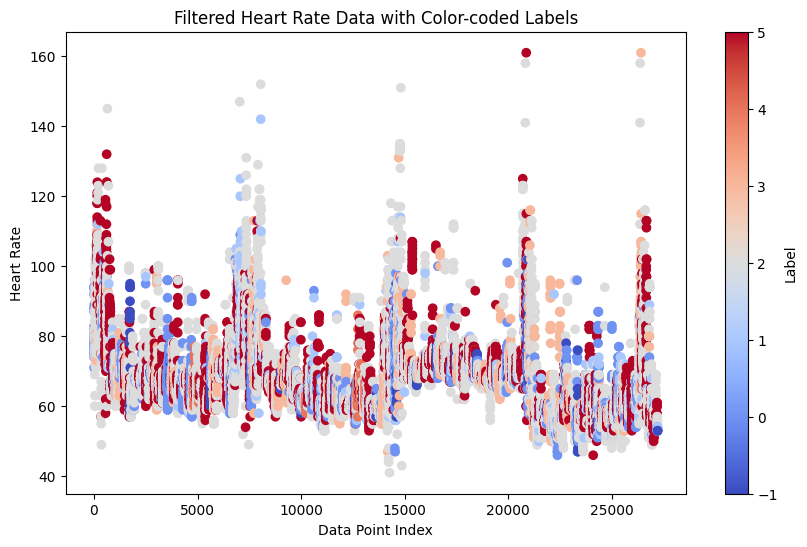

In [4]:
combined_data = combined_data.dropna()

# Filter data points with an index less than or equal to 25000
filtered_data = combined_data[combined_data.index <= 37000]

# Plot the filtered data
plt.figure(figsize=(10, 6))
plt.scatter(combined_data.index, combined_data['HeartRate'], c=combined_data['Label'].astype(int), cmap='coolwarm', marker='o')
plt.xlabel('Data Point Index')
plt.ylabel('Heart Rate')
plt.title('Filtered Heart Rate Data with Color-coded Labels')
plt.colorbar(label='Label')
plt.show()



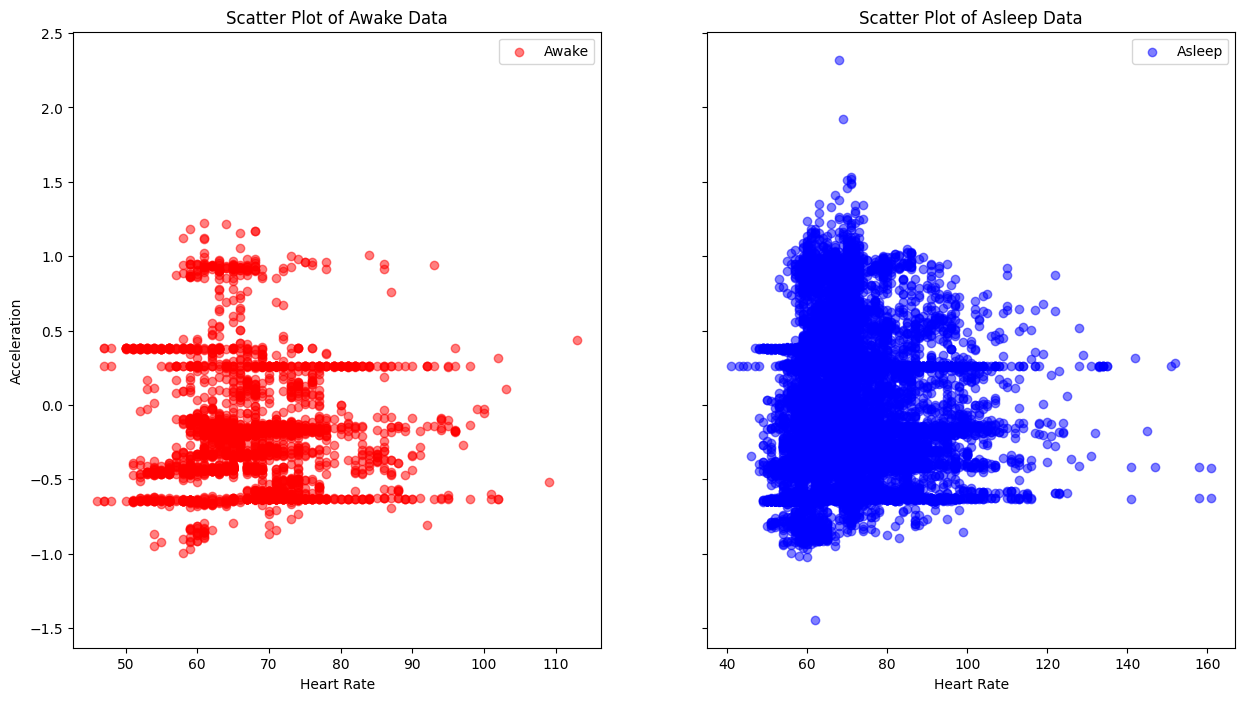

In [125]:
awake_data = combined_data[combined_data['Label'] == 0]
asleep_data = combined_data[combined_data['Label'] == 1]

# Create two separate subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8), sharey=True)

# Plot awake data
ax1.scatter(awake_data['HeartRate'], awake_data['Acceleration'], c='red', label='Awake', alpha=0.5)
ax1.set_xlabel('Heart Rate')
ax1.set_ylabel('Acceleration')
ax1.set_title('Scatter Plot of Awake Data')
ax1.legend()

# Plot asleep data
ax2.scatter(asleep_data['HeartRate'], asleep_data['Acceleration'], c='blue', label='Asleep', alpha=0.5)
ax2.set_xlabel('Heart Rate')
ax2.set_title('Scatter Plot of Asleep Data')
ax2.legend()

plt.show()


Logistic Regression Accuracy: 0.48

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.12      0.58      0.20       602
           1       0.90      0.47      0.61      4841

    accuracy                           0.48      5443
   macro avg       0.51      0.52      0.41      5443
weighted avg       0.81      0.48      0.57      5443



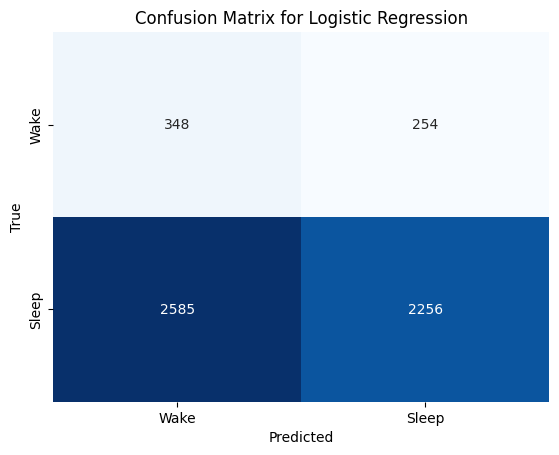

In [108]:
#Logistic regression
# Assuming combined_data is your DataFrame with columns 'HeartRate', 'Acceleration', and 'Label'
combined_data['Label'] = (combined_data['Label'] > 0).astype(int)

# Separate data into awake and asleep periods
awake_data = combined_data[combined_data['Label'] == 0]
asleep_data = combined_data[combined_data['Label'] == 1]

# Combine heart rate and acceleration into the feature matrix
X = combined_data[['HeartRate', 'Acceleration']]
y = combined_data['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (optional but often beneficial for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a logistic regression model
logistic_model = LogisticRegression(random_state=42, class_weight='balanced')
logistic_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Evaluate the logistic regression model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f'Logistic Regression Accuracy: {accuracy_logistic:.2f}')

# Display classification report and confusion matrix
print('\nLogistic Regression Classification Report:')
print(classification_report(y_test, y_pred_logistic))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_logistic)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Wake', 'Sleep'], yticklabels=['Wake', 'Sleep'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


/var/folders/88/sf5j9bhs7_xg0v5j4psd4bbr0000gq/T/ipykernel_43717/2581048127.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Label'] = (filtered_data['Label'] > 0).astype(int)


Accuracy: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.20      0.21       511
           1       0.91      0.92      0.92      4490

    accuracy                           0.85      5001
   macro avg       0.57      0.56      0.56      5001
weighted avg       0.84      0.85      0.84      5001



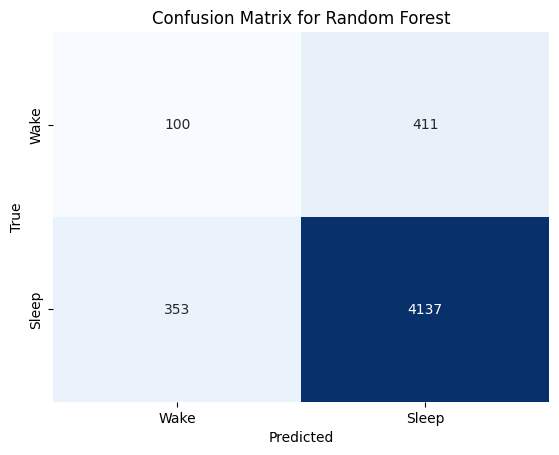

In [107]:
#Random Forest
# Drop rows with missing values
combined_data = combined_data.dropna()

# Filter data points with an index less than or equal to 25000
filtered_data = combined_data[combined_data.index <= 25000]

# Convert labels to binary: 0 or greater than 0
filtered_data['Label'] = (filtered_data['Label'] > 0).astype(int)

# Prepare features (X) and binary target variable (y)
X = filtered_data[['HeartRate', 'Acceleration']]
y = filtered_data['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (optional but often beneficial for tree-based models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Wake', 'Sleep'], yticklabels=['Wake', 'Sleep'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Random Forest')
plt.show()


In [5]:

# Function to read and concatenate data for a given subject number
def read_and_concat_data(subject_number, ind_data_folder_heart, ind_data_folder_motion, ind_data_folder_labels):
    # Find the corresponding filenames
    heart_file = os.path.join(ind_data_folder_heart, f'{subject_number}_heartrate.txt')
    labels_file = os.path.join(ind_data_folder_labels, f'{subject_number}_labeled_sleep.txt')
    motion_file = os.path.join(ind_data_folder_motion, f'{subject_number}_acceleration.txt')

    # Read data from files
    heart_data = pd.read_csv(heart_file, header=None, usecols=[1], delimiter=',', names=['HeartRate'])
    
    # Read all columns in motion data
    motion_data = pd.read_csv(motion_file, header=None, delimiter=' ', names=[f'Col{i}' for i in range(1, 5)])

    # Select the desired column (e.g., the second column for acceleration)
    motion_data = motion_data[['Col2']]
    
    labels_data = pd.read_csv(labels_file, header=None, usecols=[1], delimiter=' ', names=['Label'])

    # Combine heart rate, motion, and labels data using pd.concat
    combined_data = pd.concat([heart_data, motion_data, labels_data], axis=1)

    return combined_data

# Find and combine data for individual with number 8000685
individual_data = read_and_concat_data(8000685, data_folder_heart, data_folder_motion, data_folder_label)

# Print the first few rows of the combined data
print(individual_data.head(50))


    HeartRate      Col2  Label
0        94.0 -0.314194   -1.0
1        75.0 -0.313095   -1.0
2        78.0 -0.230743   -1.0
3        94.0 -0.302582   -1.0
4        92.0 -0.374206   -1.0
5        76.0 -0.306808    0.0
6        78.0 -0.272507    0.0
7        71.0 -0.194107    0.0
8        74.0 -0.317993    0.0
9        80.0 -0.272949    0.0
10       79.0 -0.284286    0.0
11       77.0 -0.268845    0.0
12       77.0 -0.267929    0.0
13       88.0 -0.232559    0.0
14       87.0 -0.241516    0.0
15       89.0 -0.319641    0.0
16       88.0 -0.343842    0.0
17       83.0 -0.328018    0.0
18       88.0 -0.278854    0.0
19       82.0 -0.293045    0.0
20       81.0 -0.303894    0.0
21       82.0 -0.238663    1.0
22       80.0 -0.274643    1.0
23       83.0 -0.297943    1.0
24       87.0 -0.290772    1.0
25       93.0 -0.286377    1.0
26       96.0 -0.307541    1.0
27       80.0 -0.351562    2.0
28       81.0 -0.335342    2.0
29       80.0 -0.317825    2.0
30       81.0 -0.316467    1.0
31      

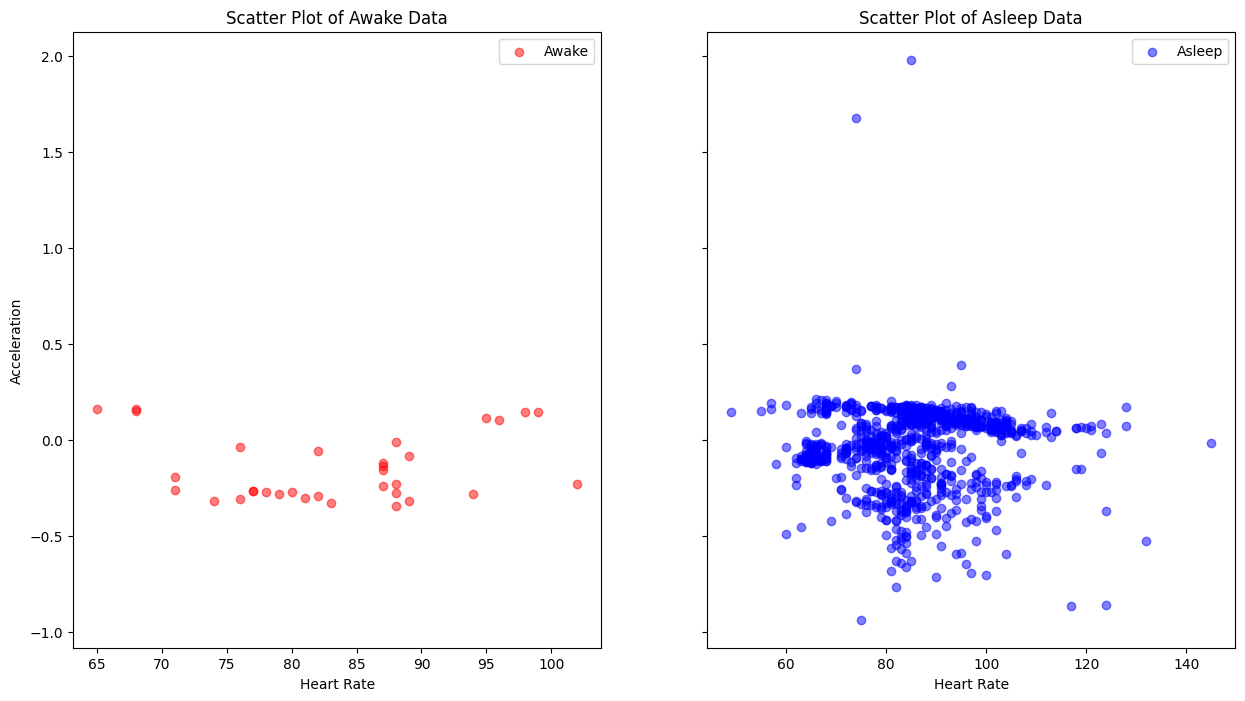

In [129]:

# Create a new column 'SleepOrWake' to indicate sleep (1) or wake (0) states
individual_data['SleepOrWake'] = individual_data['Label'].apply(lambda x: 1 if x > 0 else 0)

# Filter data for sleep and wake states
sleep_data = individual_data[individual_data['Label'] >= 0]
wake_data = individual_data[individual_data['Label'] == 0]

# Create two separate subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8), sharey=True)

# Plot awake data
ax1.scatter(wake_data['HeartRate'], wake_data['Col2'], c='red', label='Awake', alpha=0.5)
ax1.set_xlabel('Heart Rate')
ax1.set_ylabel('Acceleration')
ax1.set_title('Scatter Plot of Awake Data')
ax1.legend()

# Plot asleep data
ax2.scatter(sleep_data['HeartRate'], sleep_data['Col2'], c='blue', label='Asleep', alpha=0.5)
ax2.set_xlabel('Heart Rate')
ax2.set_title('Scatter Plot of Asleep Data')
ax2.legend()

plt.show()


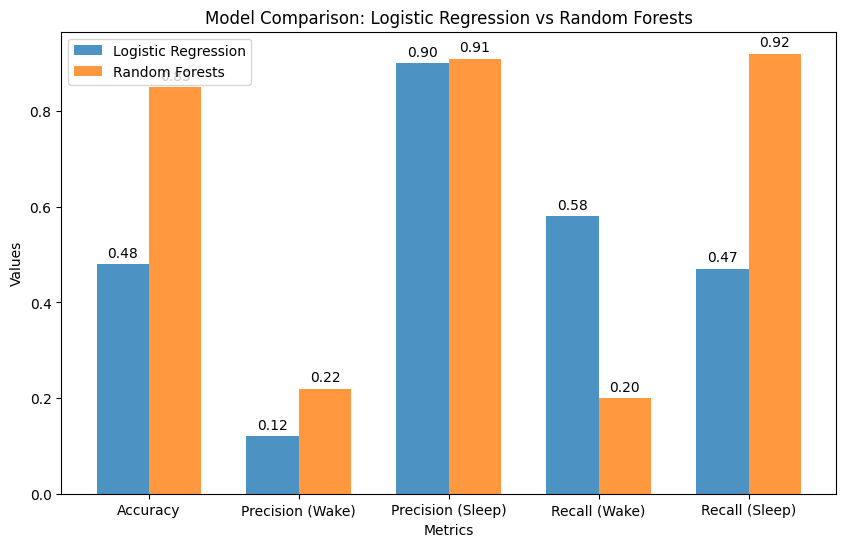

In [130]:
# Sample performance metrics (replace with your actual metrics)
accuracy = [0.48, 0.85]
precision_wake = [0.12, 0.22]
precision_sleep = [0.90, 0.91]
recall_wake = [0.58, 0.20]
recall_sleep = [0.47, 0.92]

# Data for the bar chart
metrics = ['Accuracy', 'Precision (Wake)', 'Precision (Sleep)', 'Recall (Wake)', 'Recall (Sleep)']
logistic_regression_values = [accuracy[0], precision_wake[0], precision_sleep[0], recall_wake[0], recall_sleep[0]]
random_forests_values = [accuracy[1], precision_wake[1], precision_sleep[1], recall_wake[1], recall_sleep[1]]

bar_width = 0.35
index = np.arange(len(metrics))

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(index, logistic_regression_values, bar_width, label='Logistic Regression', alpha=0.8)
bar2 = ax.bar(index + bar_width, random_forests_values, bar_width, label='Random Forests', alpha=0.8)

# Add labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Model Comparison: Logistic Regression vs Random Forests')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metrics)
ax.legend()

# Display the values on top of the bars
for bar in [bar1, bar2]:
    for rect in bar:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.show()
